In [990]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm as cm_mlib
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import scipy
%matplotlib inline
plt.viridis()
from matplotlib import animation, rc, colors
from IPython.display import HTML
from brian2.units import *
import matplotlib as mlib
from scipy import stats
from pprint import pprint as pp
from mpl_toolkits.axes_grid1 import make_axes_locatable, ImageGrid
from simulation_statistics.analysis_functions_definitions import *
import traceback
from sklearn.metrics import confusion_matrix, classification_report

In [991]:
mlib.rcParams.update({'font.size': 24})
mlib.rcParams.update({'errorbar.capsize': 5})
mlib.rcParams.update({'figure.autolayout': True})

In [992]:
# https://gist.github.com/MatthewJA/5a0a6d75748bf5cb5962cb9d5572a6ce
cyclic_viridis = colors.LinearSegmentedColormap.from_list(
    'cyclic_viridis',
    [(0, cm_mlib.viridis.colors[0]),
     (0.25, cm_mlib.viridis.colors[256 // 3]),
     (0.5, cm_mlib.viridis.colors[2 * 256 // 3]),
     (0.75, cm_mlib.viridis.colors[-1]),
     (1.0, cm_mlib.viridis.colors[0])])

In [993]:
# Random delay initial network
# 2 class (easy?)
fname = "random_delay_smax_128_gmax_1_384k_sigma_7.5_3_angle_0_90_evo"  # 100% score 
# 2 class (harder?)
# TODO include 45 vs 135 here
# 4 class (easy?)
# fname = "random_delay_smax_128_gmax_1_384k_sigma_7.5_3_angle_NESW_evo"



# Constant delay initial network

# Complete the file name with training or testing
# training_type = "min"
# training_type = "max"
training_type = "uns"

# Extra suffix (given to distinguish the original file from variations of itself"
extra_suffix = ""
# extra_suffix = "_two_label_spikes" 
# extra_suffix = "_two_label_spikes_p_.2" 
# extra_suffix = "_two_label_spikes_p_.2_wta"  # Awesome for max 
# extra_suffix = "_two_label_spikes_p_.1_wta"   # Awful!  Just awful....
# extra_suffix = "_two_label_spikes_p_.1_wta_80s"   # Better than the 40s version...
# extra_suffix = "_two_label_spikes_p_.2_wta_80s"
# extra_suffix = "_one_spike_label_spikes_p_.2"  # Unacceptable + wta
# extra_suffix = "_one_spike_label_spikes_p_.1"  # Unacceptable + wta
# extra_suffix = "_one_spike_label_spikes_p_.1_wta_80s" # Completely OPPOSITE
# extra_suffix = "_one_spike_label_spikes_p_.2_wta_80s" # Not the worst (over 80%)
# extra_suffix = "_p_0.05"
# extra_suffix = "_rerun" # ace
extra_suffix = "_80s" # why does it go bad? -- does structural plasticity stabilise it

####
training_fname = "training_readout_for_" + training_type + "_" +  fname + extra_suffix
testing_fname = "testing_readout_for_" + training_type + "_" + fname + extra_suffix

# root_stats = "D:\Work\Neurogenesis-PhD\simulation_statistics\\"
root_stats = "C:\Work\phd\simulation_statistics\\"

# root_syn = "D:\Work\Neurogenesis-PhD\synaptogenesis\\"
root_syn = "C:\Work\phd\synaptogenesis\\"

suffix_test = ""
# suffix_test = "_shared_seed"
# suffix_test = "_1_angle_jitter"
suffix_test = "_2_angles"
# suffix_test = "_4_angles"
# suffix_test = "_all_angles"
# suffix_test = "_45_degrees"
# suffix_test = "_64x64"

suffix_test += "_" + training_type + extra_suffix
training_data = np.load(root_syn + training_fname + ".npz")
testing_data = np.load(root_syn + testing_fname + ".npz")
# testing_data = np.load(root_syn + "spiking_moving_bar_input\spiking_moving_bar_motif_bank_simtime_1200s.npz")

In [994]:
# Retreive data from testing data
testing_target_spikes = testing_data['target_spikes']
testing_inhibitory_spikes = testing_data['inhibitory_spikes']
testing_readout_spikes = testing_data['readout_spikes']
testing_actual_classes = testing_data['actual_classes']
testing_target_readout_projection = testing_data['target_readout_projection']

readout_sim_params = testing_data['readout_sim_params'].ravel()[0]
pp(readout_sim_params)
w_max = readout_sim_params['argparser']['w_max']
simtime = testing_data['simtime'] * ms

# Retreive data from training data
training_actual_classes = training_data['actual_classes']
training_readout_spikes = training_data['readout_spikes']
target_readout_projection = training_data['target_readout_projection']
wta_projection = training_data['wta_projection']



target_readout_projection = target_readout_projection.reshape(target_readout_projection.size/4, 4)
wta_projection = wta_projection.reshape(wta_projection.size/4, 4)
classes = np.sort(np.unique(testing_actual_classes))

training_data.close()
testing_data.close()

{'a_minus': 0.13,
 'a_plus': 0.1,
 'actual_classes': array([[90, 90, 90,  0,  0, 90, 90,  0,  0,  0,  0, 90,  0, 90, 90, 90, 90,
        90, 90,  0,  0,  0, 90,  0,  0, 90, 90, 90, 90, 90, 90, 90, 90,  0,
        90, 90,  0,  0, 90,  0, 90, 90, 90,  0, 90, 90, 90, 90, 90, 90,  0,
        90,  0,  0,  0,  0,  0, 90, 90,  0, 90,  0,  0,  0, 90,  0, 90, 90,
         0, 90,  0,  0, 90,  0,  0,  0,  0,  0,  0,  0, 90,  0,  0, 90,  0,
         0,  0, 90,  0, 90,  0,  0,  0,  0, 90, 90,  0, 90,  0, 90, 90, 90,
         0, 90,  0,  0, 90, 90,  0, 90, 90,  0, 90,  0,  0, 90, 90,  0, 90,
        90,  0,  0,  0,  0,  0, 90,  0,  0, 90,  0, 90, 90,  0, 90, 90,  0,
         0, 90, 90, 90,  0,  0,  0, 90,  0,  0, 90,  0,  0, 90, 90,  0, 90,
         0,  0,  0, 90,  0,  0,  0, 90,  0,  0,  0, 90, 90, 90,  0, 90,  0,
         0, 90,  0,  0,  0, 90, 90,  0,  0, 90, 90,  0, 90,  0, 90,  0,  0,
         0,  0,  0,  0, 90, 90,  0,  0, 90, 90, 90, 90,  0, 90,  0,  0,  0,
        90,  0, 90, 90,  0, 90, 90,

In [995]:
assert np.all(testing_target_readout_projection == target_readout_projection)

# Readout spikes

In [996]:
def plot_spikes(spikes, title, classes, filename):
    if spikes is not None:
        recast_spikes = []
        for index, value in np.ndenumerate(classes):
            recast_spikes.append(spikes[spikes[:,0]==index[0]][:,1])
        f, ax1 = plt.subplots(1, 1, figsize=(15, 6), dpi=600)
#         ax1.set_xlim((0, simtime/ms))
        ax1.set_xlim((0, 1800))
#         print recast_spikes
        ax1.eventplot(recast_spikes, linelengths=.8)
        ax1.set_xlabel('Time/ms')
        ax1.set_ylabel('Class neuron')
        ax1.set_title(title)
        plt.savefig(filename, bbox_inches='tight')
        ax1.set_yticks(np.arange(classes.size))
        ax1.set_yticklabels(np.sort(classes))
        plt.show()

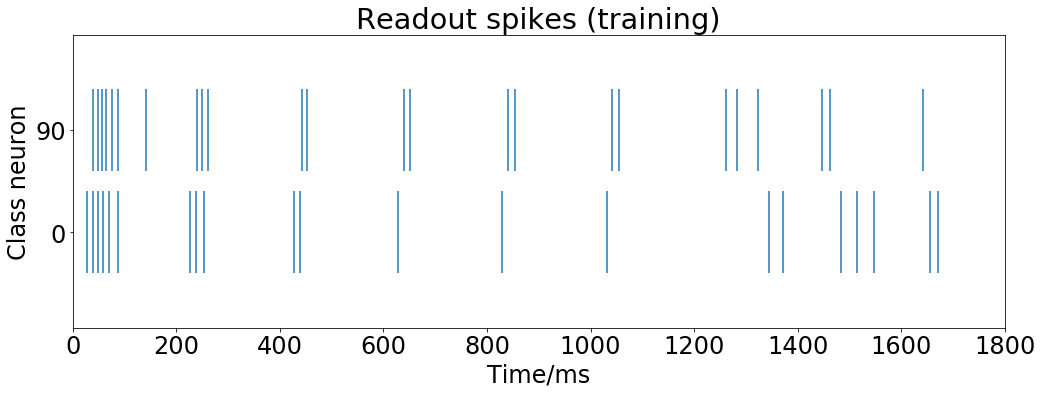

In [997]:
plot_spikes(training_readout_spikes, "Readout spikes (training)", np.unique(testing_actual_classes), "readout_training_spikes{}.pdf".format(suffix_test))

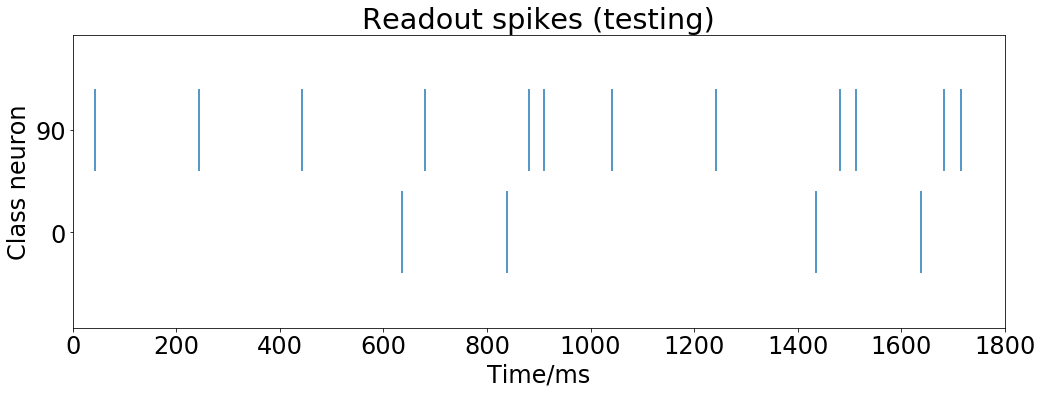

In [998]:
plot_spikes(testing_readout_spikes, "Readout spikes (testing)", np.unique(testing_actual_classes), "readout_testing_spikes{}.pdf".format(suffix_test))

In [999]:
spikes = testing_readout_spikes
print "Testing ----------------"
for index, value in np.ndenumerate(classes):
    print "Number of spikes for class", value, ":", spikes[spikes[:,0]==index[0]].size, "equivalent of ", spikes[spikes[:,0]==index[0]].size / simtime
spikes = training_readout_spikes
print "Training ----------------"
for index, value in np.ndenumerate(classes):
    print "Number of spikes for class", value, ":", spikes[spikes[:,0]==index[0]].size, "equivalent of ", spikes[spikes[:,0]==index[0]].size / simtime

Testing ----------------
Number of spikes for class 0 : 488 equivalent of  6.1 Hz
Number of spikes for class 90 : 1024 equivalent of  12.8 Hz
Training ----------------
Number of spikes for class 0 : 606 equivalent of  7.575 Hz
Number of spikes for class 90 : 468 equivalent of  5.85 Hz


# Do readout spikes have any classification power?

In [1000]:
chunk = 200
instaneous_rates = np.empty((classes.size, int((simtime/ms)//chunk)))
for index, value in np.ndenumerate(instaneous_rates):
    number_index, chunk_index = index
    instaneous_rates[number_index, chunk_index] = np.count_nonzero(
            np.logical_and(
                testing_readout_spikes[testing_readout_spikes[:,0]==number_index][:, 1] >= (chunk_index * chunk), 
                testing_readout_spikes[testing_readout_spikes[:,0]==number_index][:, 1] < ((chunk_index+1) * chunk)
            )
        ) 

In [1001]:
what_network_thinks = np.empty(int((simtime/ms)//chunk))
for i in range(what_network_thinks.shape[0]):
    what_network_thinks[i] = np.argmax(instaneous_rates[:, i])
inverse_classes = classes[::-1]
print classification_report(testing_actual_classes.ravel(), classes[what_network_thinks.astype(int)].ravel())
print
print classes[what_network_thinks.astype(int)]
print " Inverse class------"
print classification_report(testing_actual_classes.ravel(), inverse_classes[what_network_thinks.astype(int)].ravel())
print
print inverse_classes[what_network_thinks.astype(int)]

             precision    recall  f1-score   support

          0       0.67      0.44      0.53       204
         90       0.57      0.77      0.66       196

avg / total       0.62      0.60      0.59       400


[90 90 90  0 90 90 90 90 90  0 90 90 90  0  0 90 90  0 90 90  0  0 90 90  0
 90 90 90 90 90 90 90 90 90  0 90 90  0 90 90 90 90 90  0 90 90 90 90 90  0
 90 90  0 90 90  0 90  0 90 90 90 90  0  0 90 90 90 90  0 90 90 90 90 90 90
  0  0  0 90  0 90 90 90 90 90  0  0 90 90 90 90 90 90  0 90 90  0 90 90 90
  0  0 90 90 90  0 90  0 90 90 90  0 90 90  0 90 90 90 90 90 90  0 90 90 90
  0 90 90  0 90 90 90 90 90  0 90  0 90 90  0 90  0 90 90 90 90 90 90  0 90
 90  0 90 90  0 90 90 90 90  0 90  0  0  0 90 90 90 90  0 90 90  0  0  0  0
 90 90 90 90 90 90 90  0  0 90 90  0 90  0  0 90 90 90  0  0 90 90 90 90 90
 90 90 90 90 90 90  0 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90 90  0 90
 90 90 90 90  0 90 90  0 90 90  0 90 90 90  0  0 90 90 90 90 90  0  0  0 90
 90 90  0 90  0  0  0 90

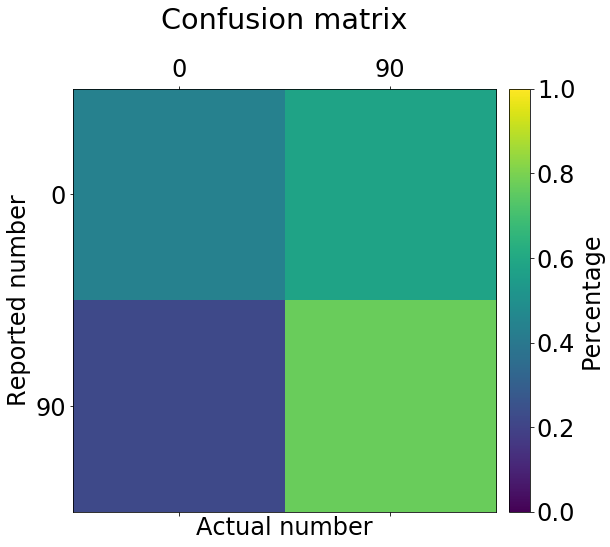

In [1002]:
confusion = confusion_matrix(testing_actual_classes.ravel(), classes[what_network_thinks.astype(int)].ravel(),  labels=classes)
confusion = confusion.astype('float') / confusion.sum(axis=1)

fig_conn, ax1 = plt.subplots(1, 1,figsize=(9,9), dpi=800)
    

ff_conn_ax = ax1.matshow(confusion, vmin=0, vmax=1)

ax1.set_title("Confusion matrix\n")
ax1.set_xlabel("Actual number")
ax1.set_ylabel("Reported number")

ax1.set_xticks(np.arange(classes.size))
ax1.set_xticklabels(classes)
ax1.set_yticks(np.arange(classes.size))
ax1.set_yticklabels(classes)


divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(ff_conn_ax, cax=cax)
cbar.set_label("Percentage")

plt.tight_layout()
plt.savefig("confusion_matrix{}.pdf".format(suffix_test), bbox_inches='tight', dpi=800)

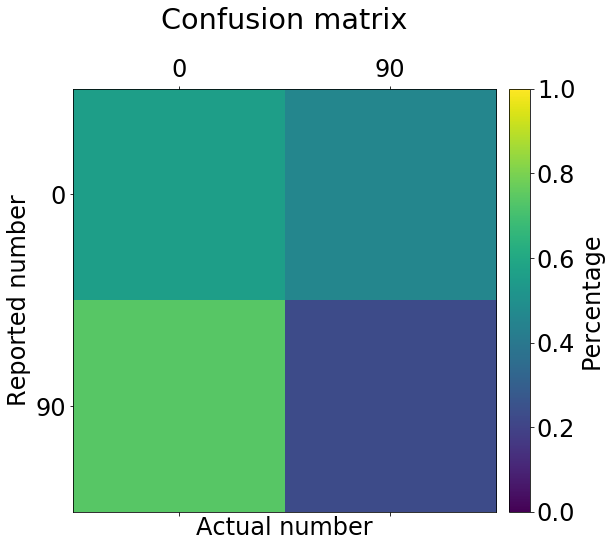

In [1003]:
#### INVERSE CLASS
confusion = confusion_matrix(testing_actual_classes.ravel(), inverse_classes[what_network_thinks.astype(int)].ravel(),  labels=classes)
confusion = confusion.astype('float') / confusion.sum(axis=1)

fig_conn, ax1 = plt.subplots(1, 1,figsize=(9,9), dpi=800)
    

ff_conn_ax = ax1.matshow(confusion, vmin=0, vmax=1)

ax1.set_title("Confusion matrix\n")
ax1.set_xlabel("Actual number")
ax1.set_ylabel("Reported number")

ax1.set_xticks(np.arange(classes.size))
ax1.set_xticklabels(classes)
ax1.set_yticks(np.arange(classes.size))
ax1.set_yticklabels(classes)


divider = make_axes_locatable(plt.gca())
cax = divider.append_axes("right", "5%", pad="3%")
cbar = plt.colorbar(ff_conn_ax, cax=cax)
cbar.set_label("Percentage")

plt.tight_layout()
plt.savefig("inverse_confusion_matrix{}.pdf".format(suffix_test), bbox_inches='tight', dpi=800)

In [1004]:
rmse = np.sqrt(np.mean(((testing_actual_classes.ravel() - classes[what_network_thinks.astype(int)].ravel())**2)))
print "RMSE", rmse


print "Inverse RMSE"
rmse = np.sqrt(np.mean(((testing_actual_classes.ravel() - inverse_classes[what_network_thinks.astype(int)].ravel())**2)))
print "RMSE", rmse

RMSE 56.7428409581
Inverse RMSE
RMSE 69.8587861332


# Readout weights

0.19921875
0.19921875


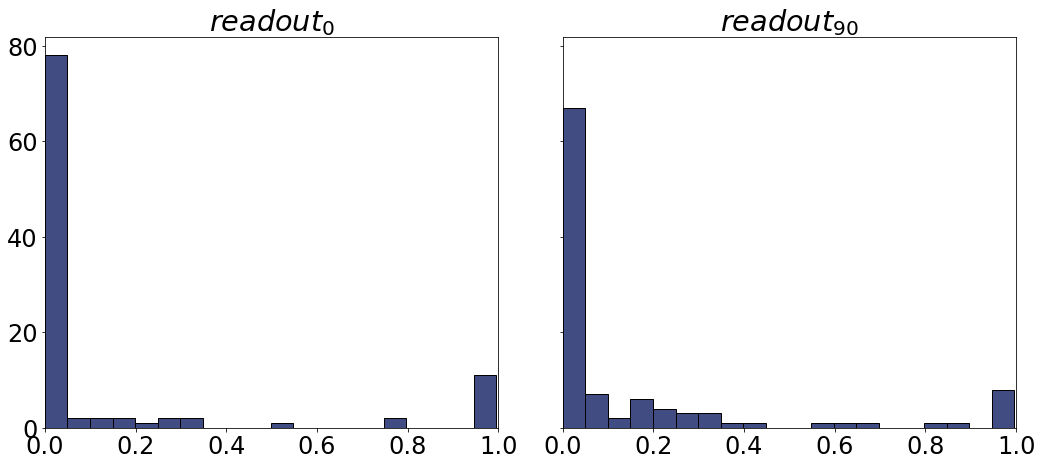

In [1005]:
conns = []
conns_names = []
for index, value in np.ndenumerate(classes):
    conns.append(target_readout_projection[target_readout_projection[:,1]==index[0]])
    conns_names.append("$readout_{%s}$" % str(value))
f, axes = plt.subplots(1,classes.size, figsize=(15, 7), dpi=800, sharey=True)



minimus = 0
maximus = 1
for index, ax in np.ndenumerate(axes): 
    i = index[0]
    ax.hist(conns[i][:,2]/w_max, bins=20, color='#414C82', edgecolor='k')
    ax.set_title(conns_names[i])
    ax.set_xlim([minimus, maximus])
    print np.max(conns[i][:,2])
    assert np.max(conns[i][:,2]) <= w_max
#     ax.set_xticklabels(["0", "0.5", "1"])
#     print conns[i][:,2]

# f.suptitle("Mean firing rate for specific input angle", va='bottom')
plt.tight_layout()
plt.savefig("readout_weight_histograms{}.pdf".format(suffix_test), bbox_inches='tight')
plt.show()

In [1006]:
classification_report(testing_actual_classes.ravel(), classes[what_network_thinks.astype(int)].ravel())

'             precision    recall  f1-score   support\n\n          0       0.67      0.44      0.53       204\n         90       0.57      0.77      0.66       196\n\navg / total       0.62      0.60      0.59       400\n'

In [1007]:
classification_report(y_true=testing_actual_classes.ravel(), y_pref=classes[what_network_thinks.astype(int)].ravel(), output_dict=True)

TypeError: classification_report() got an unexpected keyword argument 'y_pref'